<a href="https://colab.research.google.com/github/JumanaSrour/smile-detections/blob/main/smileDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import h5py

from keras.models import Sequential 
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
train_file = h5py.File('train_happy.h5')
test_file = h5py.File('test_happy.h5')

In [ ]:
train_x = np.array(train_file['train_set_x'][:])
train_y = np.array(train_file['train_set_y'][:])

test_x = np.array(test_file['test_set_x'][:])
test_y = np.array(test_file['test_set_y'][:])

In [ ]:
print(train_x.shape)
print(train_y.shape)

(600, 64, 64, 3)
(600,)


In [ ]:
print(test_x.shape)
print(test_y.shape)

(150, 64, 64, 3)
(150,)


In [ ]:
train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))

print(train_y.shape)
print(test_y.shape)

(1, 600)
(1, 150)


In [ ]:
print(train_y)

[[0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1
  0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1
  0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0
  1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0
  0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1
  0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0
  1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1
  1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0
  1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1
  0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1
  0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1
  1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0
  1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 

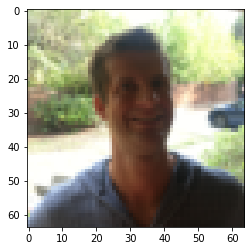

In [ ]:
plt.imshow(train_x[1])

In [ ]:
X_train = train_x / 255.0
X_test = test_x / 255.0

Y_train = train_y.T
Y_test = test_y.T

In [ ]:
print(Y_train)

[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='Same', input_shape=(64,64,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='Same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='Same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 30
batch_size = 30

In [ ]:
history = model.fit(x=X_train, y=Y_train, epochs=epochs, verbose=2,batch_size=batch_size)

Epoch 1/30
20/20 - 28s - loss: 1.2691 - accuracy: 0.5250
Epoch 2/30
20/20 - 14s - loss: 0.6506 - accuracy: 0.6317
Epoch 3/30
20/20 - 14s - loss: 0.5793 - accuracy: 0.6933
Epoch 4/30
20/20 - 14s - loss: 0.4122 - accuracy: 0.8133
Epoch 5/30
20/20 - 14s - loss: 0.3388 - accuracy: 0.8683
Epoch 6/30
20/20 - 14s - loss: 0.2585 - accuracy: 0.8950
Epoch 7/30
20/20 - 13s - loss: 0.1589 - accuracy: 0.9367
Epoch 8/30
20/20 - 14s - loss: 0.2621 - accuracy: 0.8900
Epoch 9/30
20/20 - 14s - loss: 0.1322 - accuracy: 0.9583
Epoch 10/30
20/20 - 13s - loss: 0.0846 - accuracy: 0.9717
Epoch 11/30
20/20 - 13s - loss: 0.1110 - accuracy: 0.9600
Epoch 12/30
20/20 - 14s - loss: 0.0552 - accuracy: 0.9817
Epoch 13/30
20/20 - 13s - loss: 0.0770 - accuracy: 0.9733
Epoch 14/30
20/20 - 14s - loss: 0.0479 - accuracy: 0.9850
Epoch 15/30
20/20 - 14s - loss: 0.0568 - accuracy: 0.9783
Epoch 16/30
20/20 - 14s - loss: 0.0516 - accuracy: 0.9850
Epoch 17/30
20/20 - 14s - loss: 0.0550 - accuracy: 0.9800
Epoch 18/30
20/20 - 14s

In [ ]:
test_score = model.evaluate(X_test, Y_test, verbose=1)

5/5 [==============================] - 1s 169ms/step - loss: 0.2503 - accuracy: 0.9467


In [ ]:
print('test loss:', test_score[0])
print('test accuracy:', test_score[1])

test loss: 0.2503231167793274
test accuracy: 0.9466666579246521


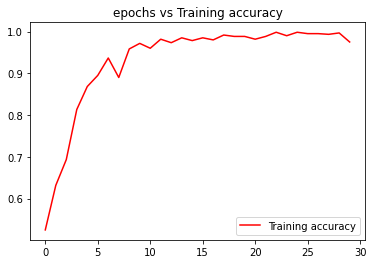

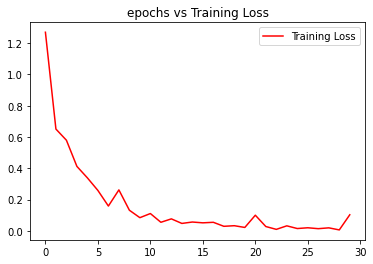

In [ ]:
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']

E = range(len(training_accuracy))
plt.plot(E, training_accuracy, color='red', label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(E, training_loss, color='red', label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()